In [6]:
from google.colab import drive
drive.mount('/content/drive')
!cd /content/drive/MyDrive/CSC522
!pwd
print('done')

Mounted at /content/drive
/content
done


In [ ]:
pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from transformers import pipeline
from transformers import AutoModel, AutoTokenizer 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CSC522/data/xlnet_preds.csv").dropna()

In [ ]:
df.head()

,Unnamed: 0,product,title,rating,body,xlnet_prediction,raw_output_score
0,20898,Mgnaooi Magnetic Case for iPhone 14 Pro Max Ca...,As advertised,5,I have not dropped my phone so I cannot rate t...,1,"[-4.140756130218506, -2.861217975616455, 5.498..."
1,2317,DEENAKIN iPhone 12 Pro Max Case with Screen Pr...,Ok,3,Grip is perfect. Does not protect screen when ...,0,"[-1.5178778171539307, 3.592050075531006, -2.30..."
2,20479,K TOMOTO Compatible with iPhone 12 Case/iPhone...,I love this case!,5,I like the red. I like the feel and the fit.,1,"[-4.287395000457764, -2.3906285762786865, 5.19..."
3,3502,"JJGoo Compatible with iPhone 11 Case, Clear Gl...",Good buy,5,Cute and durable,1,"[-4.29183292388916, -2.2917089462280273, 5.154..."
4,18484,Miracase Liquid Silicone Case Compatible with ...,Pretty and protective,5,I love the color (light pink) and the feel of ...,1,"[-4.379482269287109, -2.3394289016723633, 5.08..."


In [ ]:
clusters = {"Neg": None, "Neu": None, "Pos": None}
arr = [-1, 0, 1]

i = 0
for k, v in clusters.items():
  clusters[k] = df[df["xlnet_prediction"] == arr[i]]
  i+=1

In [ ]:
# Define the model repo
# model_name = "nlptown/bert-base-multilingual-uncased-sentiment" 
# sentiment_pipeline = pipeline(model=model_name)

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
neg = clusters["Neg"]["body"].tolist()
neg_ = []
for t in neg:
  neg_.append(t[:512])

neg = sentiment_pipeline(neg_)

In [ ]:
neu = clusters["Neu"]["body"].tolist()
neu_ = []
for t in neu:
  neu_.append(t[:512])

neu = sentiment_pipeline(neu_)

In [ ]:
pos = clusters["Pos"]["body"].tolist()
pos_ = []
for t in pos:
  pos_.append(t[:512])

pos = sentiment_pipeline(pos_)

In [ ]:
clusters["Neg"]["sent_analysis_label"] = neg
clusters["Neu"]["sent_analysis_label"] = neu
clusters["Pos"]["sent_analysis_label"] = pos

<ipython-input-23-0213666efee8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters["Neg"]["sent_analysis_label"] = neg
<ipython-input-23-0213666efee8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters["Neu"]["sent_analysis_label"] = neu
<ipython-input-23-0213666efee8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
frames = [clusters["Neg"], clusters["Neu"], clusters["Pos"]]
result = pd.concat(frames)

In [ ]:
# result.to_csv("/content/drive/MyDrive/CSC522/data/xlnet_preds_sentiment_analysis.csv")

In [3]:
import matplotlib.pyplot as plt
import json
import math
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
import pandas as pd
import numpy as np

In [7]:
base = pd.read_csv("/content/drive/MyDrive/CSC522/data/balanced_data_set_3000_sentiment_analysis.csv", index_col=0).drop_duplicates()
preds = pd.read_csv("/content/drive/MyDrive/CSC522/data/xlnet_preds_sentiment_analysis.csv", index_col=0).drop_duplicates()
tmp = [base, preds]
all = pd.concat(tmp)

In [8]:
all

,Unnamed: 0,product,title,rating,body,generalized_rating,generalized_ai_rating,sent_analysis_label,xlnet_prediction,raw_output_score
0,7300,OTTERBOX COMMUTER SERIES Case for iPhone 12 &a...,came used,1,"mine came dirty, so I’m pretty sure it was use...",-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.9995760321617...",NaN,NaN
1,2534,DEENAKIN iPhone 12 Pro Max Case with Screen Pr...,eh,2,it’s more pink than it is orange and it doesn’...,-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.9979062080383...",NaN,NaN
2,7335,OTTERBOX COMMUTER SERIES Case for iPhone 12 &a...,Not good,1,The item does. It cover the entire device. Not...,-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.9997715353965...",NaN,NaN
3,25480,ULAK Clear Case Compatible with iPhone 11 6.1-...,Not very good at all,2,If you’re looking for something clear this is ...,-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.999556839466095}",NaN,NaN
4,6499,"MATEPROX iPhone Xs case,iPhone X Glitter Bling...",Disappointed,1,"I guess, what did I expect for a case that cos...",-1.0,0.0,"{'label': 'POSITIVE', 'score': 0.9041923880577...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4995,874,"Cordking iPhone 11 Case, Silicone Ultra Slim S...",Soft to hold but sturdy for protection,5,I’ve never had a phone cover that was soft to ...,NaN,NaN,"{'label': 'POSITIVE', 'score': 0.995725154876709}",1.0,"[-4.246420860290527, -2.693830966949463, 5.426..."
4996,21147,Mgnaooi Magnetic Case for iPhone 14 Pro Max Ca...,I love it!!!,5,It feels very comfortable in my hands and it’s...,NaN,NaN,"{'label': 'POSITIVE', 'score': 0.9983905553817...",1.0,"[-4.140189170837402, -2.651003837585449, 5.365..."
4997,25661,ULAK Clear Case Compatible with iPhone 11 6.1-...,Keeps your phone from cracking,5,Simple and cute keeps it from cracking,NaN,NaN,"{'label': 'POSITIVE', 'score': 0.9997469782829...",1.0,"[-4.228137969970703, -2.6457791328430176, 5.37..."
4998,17070,Qokey Compatible with iPhone SE Case 2022/2020...,So far so good.,5,Was a Christmas gift for my daughter. She love...,NaN,NaN,"{'label': 'POSITIVE', 'score': 0.9998657703399...",1.0,"[-4.256710052490234, -2.565300464630127, 5.344..."


In [9]:
tmp = all["sent_analysis_label"]

In [10]:
sent_scores=[]

for s in tmp:
  sent_scores.append(eval(s.replace("'", "\"")))

score = []
for s in all["generalized_rating"]:
  if not math.isnan(s):
    score.append(s)

for s in all["xlnet_prediction"]:
  if not math.isnan(s):
    score.append(s)

sent_score = []
label = []
for s in sent_scores:
  sent_score.append(s["score"])
  label.append(s["label"])

# sent_scores

In [23]:
 clusters["Pos"]["label"].value_counts()

POSITIVE    5842
NEGATIVE     803
Name: label, dtype: int64

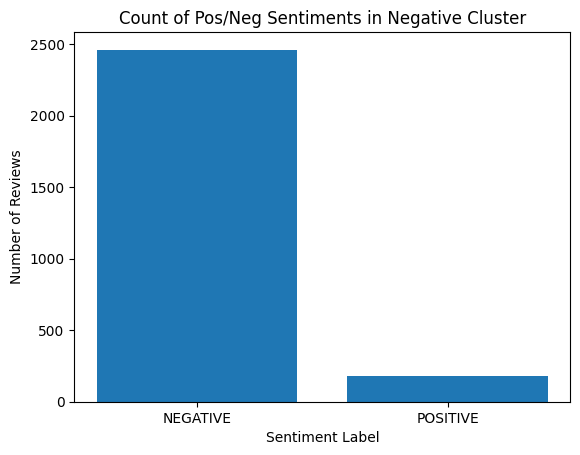

In [26]:
labels = ["NEGATIVE", "POSITIVE"]
plt.bar(labels, clusters["Neg"]["label"].value_counts())

plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment Label")
plt.title("Count of Pos/Neg Sentiments in Negative Cluster")

plt.show()

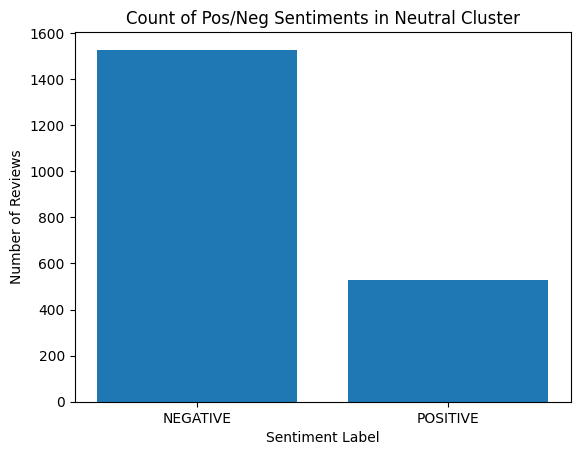

In [27]:
labels = ["NEGATIVE", "POSITIVE"]
plt.bar(labels, clusters["Neu"]["label"].value_counts())

plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment Label")
plt.title("Count of Pos/Neg Sentiments in Neutral Cluster")

plt.show()

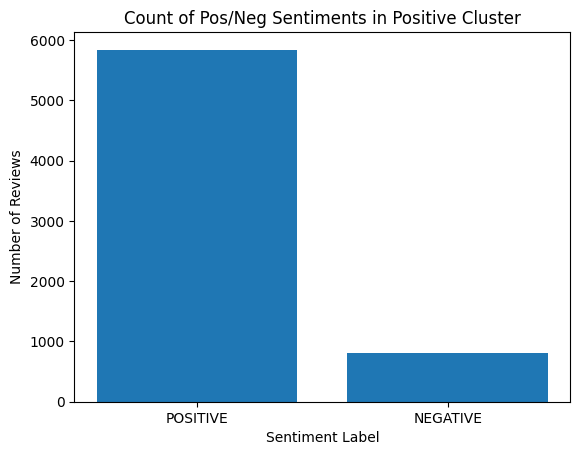

In [28]:
labels = ["POSITIVE", "NEGATIVE"]
plt.bar(labels, clusters["Pos"]["label"].value_counts())

plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment Label")
plt.title("Count of Pos/Neg Sentiments in Positive Cluster")

plt.show()

In [11]:
all["rating_"] = score
all["sent_score"] = sent_score
all["label"] = label

all.head()

,Unnamed: 0,product,title,rating,body,generalized_rating,generalized_ai_rating,sent_analysis_label,xlnet_prediction,raw_output_score,rating_,sent_score,label
0,7300,OTTERBOX COMMUTER SERIES Case for iPhone 12 &a...,came used,1,"mine came dirty, so I’m pretty sure it was use...",-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.9995760321617...",NaN,NaN,-1.0,0.999576,NEGATIVE
1,2534,DEENAKIN iPhone 12 Pro Max Case with Screen Pr...,eh,2,it’s more pink than it is orange and it doesn’...,-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.9979062080383...",NaN,NaN,-1.0,0.997906,NEGATIVE
2,7335,OTTERBOX COMMUTER SERIES Case for iPhone 12 &a...,Not good,1,The item does. It cover the entire device. Not...,-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.9997715353965...",NaN,NaN,-1.0,0.999772,NEGATIVE
3,25480,ULAK Clear Case Compatible with iPhone 11 6.1-...,Not very good at all,2,If you’re looking for something clear this is ...,-1.0,0.0,"{'label': 'NEGATIVE', 'score': 0.999556839466095}",NaN,NaN,-1.0,0.999557,NEGATIVE
4,6499,"MATEPROX iPhone Xs case,iPhone X Glitter Bling...",Disappointed,1,"I guess, what did I expect for a case that cos...",-1.0,0.0,"{'label': 'POSITIVE', 'score': 0.9041923880577...",NaN,NaN,-1.0,0.904192,POSITIVE


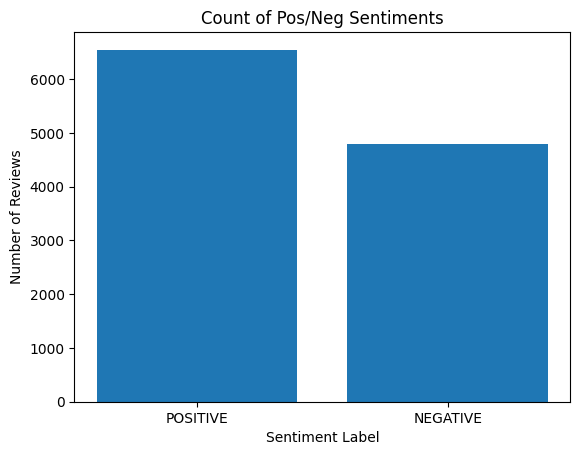

In [12]:
labels = ["POSITIVE", "NEGATIVE"]
plt.bar(labels, all["label"].value_counts())

plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment Label")
plt.title("Count of Pos/Neg Sentiments")

plt.show()

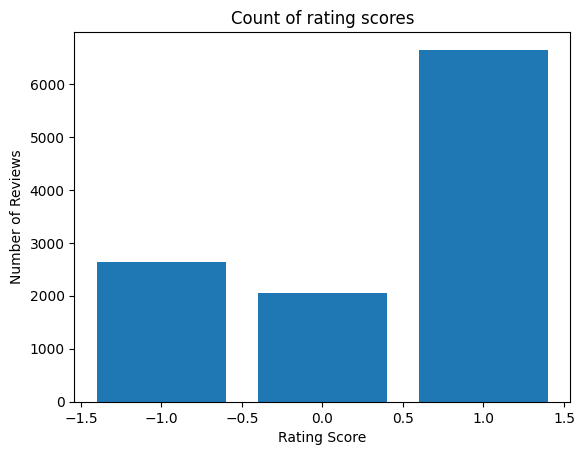

In [13]:
labels = [1, -1, 0]
plt.bar(labels, all["rating_"].value_counts())

plt.ylabel("Number of Reviews")
plt.xlabel("Rating Score")
plt.title("Count of rating scores")

plt.show()

In [14]:
clusters = {"Neg": None, "Neu": None, "Pos": None}
arr = [-1, 0, 1]

i = 0
for k, v in clusters.items():
  clusters[k] = all[all["rating_"] == arr[i]]
  i+=1

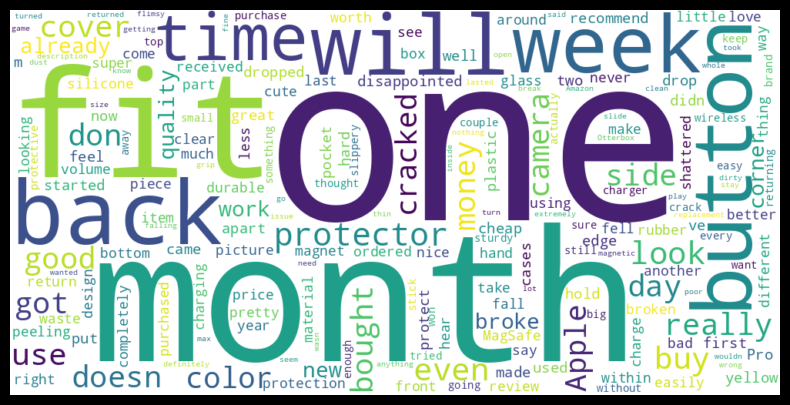

In [15]:
tmp = ""
for v in clusters["Neg"]["body"]:
  tmp += v
  tmp += ' '


stopwords= set(STOPWORDS)
new_words = ['phone', 'case', 's', 't', 'screen', 'product', 'iphone']
new_stopwords=stopwords.union(new_words)
word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=500, stopwords=new_stopwords,).generate(tmp)

plt.figure( figsize=(10,5), facecolor='k' )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

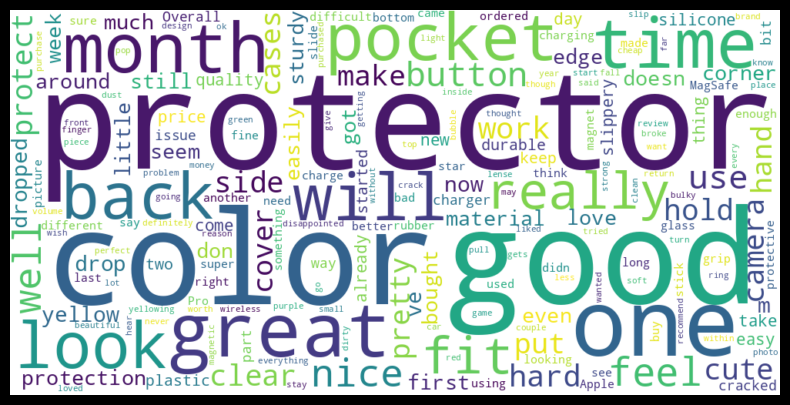

In [16]:
tmp = ""
for v in clusters["Neu"]["body"]:
  tmp += v
  tmp += ' '

word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=500, stopwords=new_stopwords,).generate(tmp)

plt.figure( figsize=(10,5), facecolor='k' )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

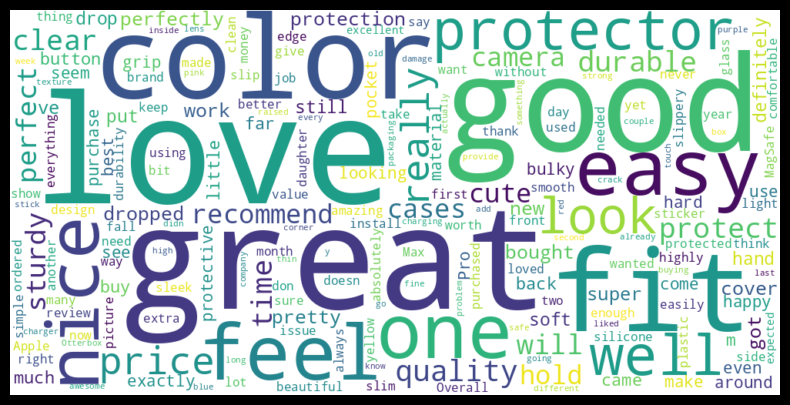

In [17]:
tmp = ""
for v in clusters["Pos"]["body"]:
  tmp += v
  tmp += ' '

word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=500, stopwords=new_stopwords,).generate(tmp)

plt.figure( figsize=(10,5), facecolor='k' )
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()